# 06c. Time series data - Version: Monthly Average Discountdata analysis
## Notebook content:

#### PART 1: Analysing time series data
    1. Importing libraries and data
    2. Subsetting, wrangling, and cleaning time-series data
    3. Time series analysis: decomposition
    4. Testing for stationarity
    5. Stationarizing the data
    
#### PART 2: Time series forecasting
    1. Defining parameters
    2. Splitting data
    3. Running and fitting the model
    4. Iterating

## PART 1: Analysing time series data

### 1. Importing libraries and data

In [14]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how the plots will appear.

In [33]:
path = r'C:\Users\bruna\Data Analysis Projects\2023-12 Superstore Sales Analysis'

In [34]:
# Import the sales data
sales_clean = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'sales_clean.pkl'))

In [46]:
sales_clean.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Segment,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Montly_Discount
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,NaN
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,NaN
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164,NaN
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694,NaN
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656,NaN


In [47]:
sales_clean.shape

(8113, 20)

### 2. Subsetting and smoothing time-series data

In [57]:
# Group by 'Order_Date' (month) and aerage of the 'Discount' and 'Profit' values
monthly_data = sales_clean.groupby(sales_clean['Order_Date'].dt.to_period('M'))[['Discount', 'Profit']].mean().reset_index()

#Rename columns for clarity
monthly_data.columns = ['Order_Month', 'Monthly_Discount', 'Monthly_Pofit']

In [58]:
monthly_data.head()

,Order_Month,Monthly_Discount,Monthly_Pofit
0,2014-01,0.112500,8.919698
1,2014-02,0.192857,9.311238
2,2014-03,0.155639,10.073594
3,2014-04,0.106696,12.977276
4,2014-05,0.128500,11.472569


In [59]:
monthly_data.shape

(48, 3)

In [60]:
# Check for missing values

monthly_data.isnull().sum() 

Order_Month         0
Monthly_Discount    0
Monthly_Pofit       0
dtype: int64

In [61]:
# Check for duplicates

dups = monthly_data.duplicated()
dups.sum()

#No dups

0

In [62]:
# Set the "Date" column as the index

from datetime import datetime

monthly_data['datetime'] = monthly_data['Order_Month'].dt.to_timestamp()
monthly_data = monthly_data.set_index('datetime') # Set the datetime as the index of the dataframe.
monthly_data.drop(['Order_Month'], axis=1, inplace=True) # Drop the "Order_Date" column.
monthly_data.head()

,Monthly_Discount,Monthly_Pofit
datetime,,
2014-01-01,0.112500,8.919698
2014-02-01,0.192857,9.311238
2014-03-01,0.155639,10.073594
2014-04-01,0.106696,12.977276
2014-05-01,0.128500,11.472569


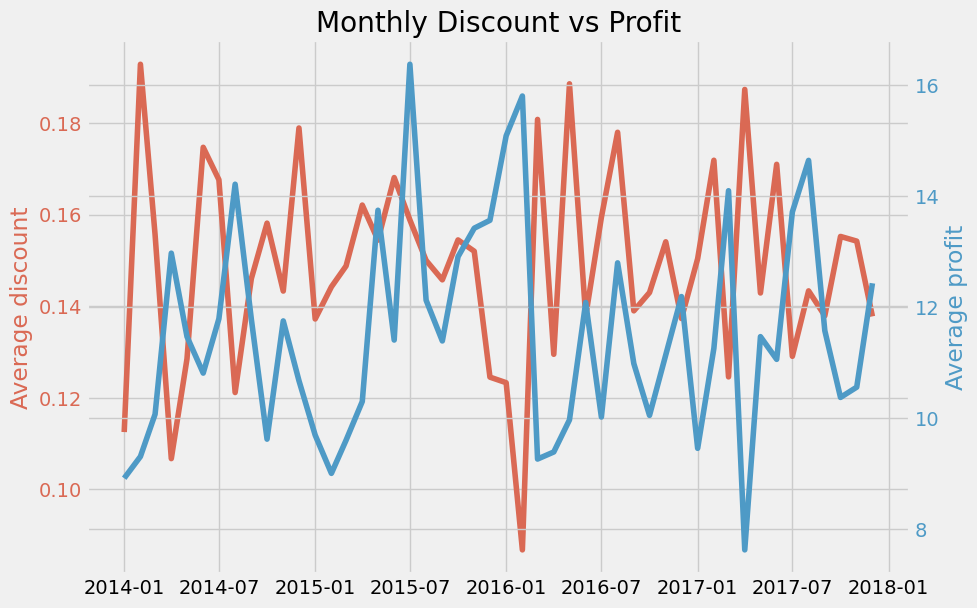

In [88]:
# Plotting average discount on the primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

color = '#DA6954'
ax1.set_ylabel('Average discount', color=color)
ax1.plot(monthly_data.index, monthly_data['Monthly_Discount'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a secondary axis for average profit
ax2 = ax1.twinx()
color = '#4E9AC6'
ax2.set_ylabel('Average profit', color=color)
ax2.plot(monthly_data.index, monthly_data['Monthly_Pofit'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Monthly Discount vs Profit')
plt.show()